In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#state characterstics

number_of_offspring_per_female = 3

In [3]:
null_preference_dictionary = {

    'A_females_preference_for_A_male': 0.8,
    'A_females_preference_for_B_male': 1 - 0.8,
    'B_females_preference_for_B_male': 0.8,
    'B_females_preference_for_A_male': 1 - 0.8,
    'A_males_preference_for_A_female': 0.8,
    'A_males_preference_for_B_female': 1 - 0.8,
    'B_males_preference_for_B_female': 0.8,
    'B_males_preference_for_A_female': 1 - 0.8
}



example_preference_dictionary = {

    'A_females_preference_for_A_male': 1,
    'A_females_preference_for_B_male': 0,
    'B_females_preference_for_B_male': 1,
    'B_females_preference_for_A_male': 0.1,
    'A_males_preference_for_A_female': 1,
    'A_males_preference_for_B_female': 0,
    'B_males_preference_for_B_female': 1,
    'B_males_preference_for_A_female': 1 - 0.5
}




In [4]:
def mating_compatibility(male_type, female_type, preference_dictionary):
    if male_type == "A":
        if female_type == "A":
            mating_compatibility = preference_dictionary['A_males_preference_for_A_female'] * preference_dictionary['A_females_preference_for_A_male']
        elif female_type == "B":
            mating_compatibility = preference_dictionary['A_males_preference_for_B_female'] * preference_dictionary['B_females_preference_for_A_male']
    elif male_type == "B":
        if female_type == "A":
            mating_compatibility = preference_dictionary['B_males_preference_for_A_female'] * preference_dictionary['A_females_preference_for_B_male']
        elif female_type == "B":
            mating_compatibility = preference_dictionary['B_males_preference_for_B_female'] * preference_dictionary['B_females_preference_for_B_male']
    return mating_compatibility


ok this is one by one mating. idk how that influences the complexity

add some denisty regulation



In [5]:
#simulation based on mating number insted of polygny number. i.e. male has a fixed number of mating attempts rather than fixed number of final mates

def simulate_two_species_over_generations(number_of_generations, population_size_of_each_species, max_mating_attempt_for_male, preference_dictionary, number_of_offspring_per_female):

        winner = "0"

        number_of_A = int(population_size_of_each_species//2)
        number_of_B = int(population_size_of_each_species//2)

        number_of_A_males = int(number_of_A//2)
        number_of_A_females = int(number_of_A//2)

        number_of_B_males = int(number_of_B//2)
        number_of_B_females = int(number_of_B//2)

        for k in range(number_of_generations):


                #make population lists based on number of individuals so that it can be sampled from
                males_A_list = ["A"]*number_of_A_males
                males_B_list = ["B"]*number_of_B_males
                females_A_list = ["A"]*number_of_A_females
                females_B_list = ["B"]*number_of_B_females

                all_males_list = males_A_list + males_B_list
                all_female_list = females_A_list + females_B_list


                #reset number of offspring to zero
                number_of_A_offspring = 0
                number_of_B_offspring = 0

                #copy coz when removing it'll cause issues
                unmated_male_list = all_males_list.copy()
                unmated_female_list = all_female_list.copy()


                #reproduction is done by mating
                while unmated_male_list != [] and unmated_female_list != []:
                
                        chosen_male_type = random.choice(unmated_male_list)

                        mating_attempt_for_male = 1

                        while mating_attempt_for_male <= max_mating_attempt_for_male and unmated_female_list != []:

                                chosen_female_type = random.choice(unmated_female_list)

                                mating_attempt_for_male += 1


                                if random.random() < mating_compatibility(chosen_male_type, chosen_female_type, preference_dictionary): 
                                        #mating success

                                        unmated_female_list.remove(chosen_female_type)
                                        
                                        if chosen_male_type == "A" and chosen_female_type == "A":
                                                number_of_A_offspring += number_of_offspring_per_female
                                        
                                        if chosen_male_type == "B" and chosen_female_type == "B":
                                                number_of_B_offspring += number_of_offspring_per_female


                total_number_of_offspring = number_of_A_offspring + number_of_B_offspring
                
                number_of_A_offspring_normalised_to_N = round((number_of_A_offspring/total_number_of_offspring)*population_size_of_each_species)
                number_of_B_offspring_normalised_to_N = round((number_of_B_offspring/total_number_of_offspring)*population_size_of_each_species)

                # print(number_of_A_offspring_normalised_to_N, "--A", number_of_B_offspring_normalised_to_N, "--B")

                #normalised number of offspring to the constant value of N

                number_of_male_A_offspring = sum(np.random.binomial(1, 0.5, number_of_A_offspring_normalised_to_N))
                number_of_female_A_offspring = number_of_A_offspring_normalised_to_N - number_of_male_A_offspring

                number_of_male_B_offspring = sum(np.random.binomial(1, 0.5, number_of_B_offspring_normalised_to_N))
                number_of_female_B_offspring = number_of_B_offspring_normalised_to_N - number_of_male_B_offspring

                if min(number_of_male_A_offspring, number_of_female_A_offspring, number_of_male_B_offspring, number_of_female_B_offspring) < 2:

                        # print(number_of_male_A_offspring, number_of_female_A_offspring, number_of_male_B_offspring, number_of_female_B_offspring)

                        if number_of_male_A_offspring < 2 or number_of_female_A_offspring == 2:
                                winner = "-1"
                        else:
                                winner = "1"                    #-1 means B wins, 1 means A wins, 0 tie

                        break   
        
                number_of_A_males = number_of_male_A_offspring
                number_of_A_females = number_of_female_A_offspring
                number_of_B_males = number_of_male_B_offspring
                number_of_B_females = number_of_female_B_offspring

        return winner

                # print(number_of_A_males, number_of_A_females, number_of_B_males, number_of_B_females)

# print(simulate_two_species_over_generations(100, 100, 10, preference_dictionary))

In [6]:
def population_outcome_for_given_parameter_combination(number_of_generations, population_size_of_each_species, max_mating_attempt_for_male,preference_dictionary, number_of_offspring_per_female):

    outcome_list = []
    for i in range(10):
        outcome = simulate_two_species_over_generations(number_of_generations, population_size_of_each_species, max_mating_attempt_for_male, preference_dictionary, number_of_offspring_per_female)
        outcome_list.append(int(outcome))
        
    avg_outcome = np.mean(outcome_list)
    return avg_outcome


population_outcome_for_given_parameter_combination(100, 10000, 1000 ,null_preference_dictionary, 2)

    
    


-0.4

In [7]:
alpha_list = []
avg_outcome_list = []

for alpha in np.arange(0.5, 1, 0.1):

    preference_dictionary_for_alpha = {

        'A_females_preference_for_A_male': 0.8,
        'A_females_preference_for_B_male': 0.2,
        'B_females_preference_for_B_male': 0.8,
        'B_females_preference_for_A_male': 0.2,
        'A_males_preference_for_A_female': alpha,
        'A_males_preference_for_B_female': 1 - alpha,
        'B_males_preference_for_B_female': 0.5,
        'B_males_preference_for_A_female': 0.5
    }


    avg_outcome = population_outcome_for_given_parameter_combination(100, 10000, 5 ,preference_dictionary_for_alpha, 3)
    
    alpha_list.append(alpha)
    avg_outcome_list.append(avg_outcome)




[-0.6, -0.6, -0.8, -0.8, -0.8]


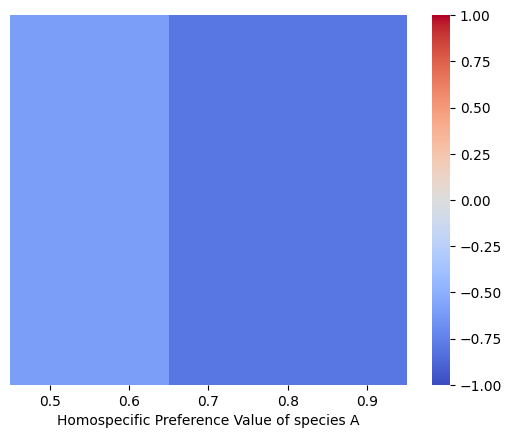

In [8]:
print(avg_outcome_list)
sns.heatmap([avg_outcome_list], xticklabels=np.round(alpha_list, 1), yticklabels=False, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.xlabel('Homospecific Preference Value of species A')

plt.show()


Investigating if number of wrong matings for A --


Prediction - total number of matings might be the same (might be A is better also)
But A will have dispropritoalely large number of wrong matings

Do this for different paprameter values 


count number of matings A and B

In [9]:
#simulation based on mating number insted of polygny number. i.e. male has a fixed number of mating attempts rather than fixed number of final mates

def simulate_two_species_over_generations_investigation(number_of_generations, population_size_of_each_species, max_mating_attempt_for_male, preference_dictionary, number_of_offspring_per_female):

        winner = "0"

        number_of_correct_matings_female_a = 0
        number_of_correct_matings_female_b = 0

        number_of_wrong_matings_female_a = 0
        number_of_wrong_matings_female_b = 0

        number_of_A = int(population_size_of_each_species//2)
        number_of_B = int(population_size_of_each_species//2)

        number_of_A_males = int(number_of_A//2)
        number_of_A_females = int(number_of_A//2)

        number_of_B_males = int(number_of_B//2)
        number_of_B_females = int(number_of_B//2)

        for k in range(number_of_generations):


                #make population lists based on number of individuals so that it can be sampled from
                males_A_list = ["A"]*number_of_A_males
                males_B_list = ["B"]*number_of_B_males
                females_A_list = ["A"]*number_of_A_females
                females_B_list = ["B"]*number_of_B_females

                all_males_list = males_A_list + males_B_list
                all_female_list = females_A_list + females_B_list


                #reset number of offspring to zero
                number_of_A_offspring = 0
                number_of_B_offspring = 0

                #copy coz when removing it'll cause issues
                unmated_male_list = all_males_list.copy()
                unmated_female_list = all_female_list.copy()


                #reproduction is done by mating
                while unmated_male_list != [] and unmated_female_list != []:
                
                        chosen_male_type = random.choice(unmated_male_list)

                        mating_attempt_for_male = 1

                        while mating_attempt_for_male <= max_mating_attempt_for_male and unmated_female_list != []:

                                chosen_female_type = random.choice(unmated_female_list)

                                mating_attempt_for_male += 1


                                if random.random() < mating_compatibility(chosen_male_type, chosen_female_type, preference_dictionary): 
                                        #mating success

                                        unmated_female_list.remove(chosen_female_type)

        
                                        
                                        if chosen_male_type == "A" and chosen_female_type == "A":
                                                number_of_correct_matings_female_a += 1
                                                number_of_A_offspring += number_of_offspring_per_female
                                        
                                        if chosen_male_type == "B" and chosen_female_type == "B":
                                                number_of_correct_matings_female_b += 1
                                                number_of_B_offspring += number_of_offspring_per_female
                                        
                                        if chosen_male_type == "A" and chosen_female_type == "B":
                                                number_of_wrong_matings_female_a  += 1

                                        if chosen_male_type == "B" and chosen_female_type == "A":
                                                number_of_wrong_matings_female_b  += 1



                total_number_of_offspring = number_of_A_offspring + number_of_B_offspring
                
                number_of_A_offspring_normalised_to_N = round((number_of_A_offspring/total_number_of_offspring)*population_size_of_each_species)
                number_of_B_offspring_normalised_to_N = round((number_of_B_offspring/total_number_of_offspring)*population_size_of_each_species)

                # print(number_of_A_offspring_normalised_to_N, "--A", number_of_B_offspring_normalised_to_N, "--B")
                #normalised number of offspring to the constant value of N

                total_number_of_matings_female_A = number_of_correct_matings_female_a + number_of_wrong_matings_female_a
                total_number_of_matings_female_B = number_of_correct_matings_female_b + number_of_wrong_matings_female_b

                mating_data_dict = {
                "female A correct": number_of_correct_matings_female_a,
                "female B correct": number_of_correct_matings_female_b,
                "female A wrong": number_of_wrong_matings_female_a,
                "female B wrong": number_of_wrong_matings_female_b,
                "total female A": total_number_of_matings_female_A,
                "total female B": total_number_of_matings_female_B,
                "fraction of wrong matings A": number_of_wrong_matings_female_a/total_number_of_matings_female_A,
                "fraction of wrong matings B": number_of_wrong_matings_female_b/total_number_of_matings_female_B
        
                }




                number_of_male_A_offspring = sum(np.random.binomial(1, 0.5, number_of_A_offspring_normalised_to_N))
                number_of_female_A_offspring = number_of_A_offspring_normalised_to_N - number_of_male_A_offspring

                number_of_male_B_offspring = sum(np.random.binomial(1, 0.5, number_of_B_offspring_normalised_to_N))
                number_of_female_B_offspring = number_of_B_offspring_normalised_to_N - number_of_male_B_offspring

                if min(number_of_male_A_offspring, number_of_female_A_offspring, number_of_male_B_offspring, number_of_female_B_offspring) < 2:

                        # print(number_of_male_A_offspring, number_of_female_A_offspring, number_of_male_B_offspring, number_of_female_B_offspring)

                        if number_of_male_A_offspring <= 2 or number_of_female_A_offspring <= 2:
                                winner = "-1"
                        else:
                                winner = "1"                    #-1 means B wins, 1 means A wins, 0 tie

                        break   
        
                number_of_A_males = number_of_male_A_offspring
                number_of_A_females = number_of_female_A_offspring
                number_of_B_males = number_of_male_B_offspring
                number_of_B_females = number_of_female_B_offspring

        return  mating_data_dict

                # print(number_of_A_males, number_of_A_females, number_of_B_males, number_of_B_females)

# print(simulate_two_species_over_generations(100, 100, 10, preference_dictionary))

In [10]:
def find_average_mating_dictionary(preference_dictionary):

    number_of_runs = 50

    mating_data_dict_list = [simulate_two_species_over_generations_investigation(1, 1000, 1, preference_dictionary, 3) for i in range(number_of_runs)]
    mating_data_dict_temp = mating_data_dict_list[0]
    average_mating_dat_dict = {}

    for key in mating_data_dict_temp.keys():
        total_value = 0
        for d in mating_data_dict_list:
            total_value += d.get(key)
        average_mating_dat_dict[key] = total_value / len(mating_data_dict_list)

    return average_mating_dat_dict

In [11]:
alpha = 0.8

preference_dictionary_for_alpha = {

    'A_females_preference_for_A_male': 0.8,
    'A_females_preference_for_B_male': 0.2,
    'B_females_preference_for_B_male': 0.8,
    'B_females_preference_for_A_male': 0.2,
    'A_males_preference_for_A_female': alpha,
    'A_males_preference_for_B_female': 1 - alpha,
    'B_males_preference_for_B_female': 0.5,
    'B_males_preference_for_A_female': 0.5

    }

average_mating_dat_dict_for_alpha = find_average_mating_dictionary(preference_dictionary_for_alpha)
print(average_mating_dat_dict_for_alpha)

{'female A correct': 216.16, 'female B correct': 227.54, 'female A wrong': 22.46, 'female B wrong': 33.84, 'total female A': 238.62, 'total female B': 261.38, 'fraction of wrong matings A': 0.09395594603764082, 'fraction of wrong matings B': 0.12928901883622232}


In [12]:
alpha_list_investigation = []
avg_outcome_list_investigation = []

for alpha in np.arange(0, 1, 0.1):

    preference_dictionary_for_alpha = {

        'A_females_preference_for_A_male': 0.8,
        'A_females_preference_for_B_male': 0.2,
        'B_females_preference_for_B_male': 0.8,
        'B_females_preference_for_A_male': 0.2,
        'A_males_preference_for_A_female': alpha,
        'A_males_preference_for_B_female': 1 - alpha,
        'B_males_preference_for_B_female': 0.5,
        'B_males_preference_for_A_female': 0.5
    }

